# Ejercicio1 - Busqueda de Alojamiento en Airbnb (Jupyter).

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [1]:
import pandas as pd
df_airbnb = pd.read_csv("./data/airbnb.csv")

In [2]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Ejercicios

### 1. Realizar Análisis Exploratorio de los datos

Sobre este apartado deberá explorar los datos como se vio en clase .. aplicar métodos shape, columns, etc

In [3]:
# --- Análisis Exploratorio de los Datos ---

import pandas as pd

# Cargar el dataset
df_airbnb = pd.read_csv("./data/airbnb.csv")


In [13]:
# Vista previa de las primeras filas
print("Vista preliminar de los datos:")
display(df_airbnb.head())



Vista preliminar de los datos:


,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [14]:
# Dimensiones del dataset (filas y columnas)
print("\nDimensiones del dataset:")
print(df_airbnb.shape)




Dimensiones del dataset:
(13232, 9)


In [15]:
# Nombres de las columnas
print("\nColumnas del dataset:")
print(df_airbnb.columns)




Columnas del dataset:
Index(['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price'],
      dtype='object')


In [16]:
# Tipos de datos de cada columna
print("\nTipos de datos:")
print(df_airbnb.dtypes)




Tipos de datos:
room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object


In [17]:
# Información general del DataFrame
print("\nInformación general:")
df_airbnb.info()




Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               13232 non-null  int64  
 1   host_id               13232 non-null  int64  
 2   room_type             13232 non-null  object 
 3   neighborhood          13232 non-null  object 
 4   reviews               13232 non-null  int64  
 5   overall_satisfaction  13222 non-null  float64
 6   accommodates          13232 non-null  int64  
 7   bedrooms              13232 non-null  float64
 8   price                 13232 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 930.5+ KB


In [18]:
# Valores nulos en cada columna
print("\nValores nulos por columna:")
print(df_airbnb.isnull().sum())




Valores nulos por columna:
room_id                  0
host_id                  0
room_type                0
neighborhood             0
reviews                  0
overall_satisfaction    10
accommodates             0
bedrooms                 0
price                    0
dtype: int64


In [19]:
# Estadísticas descriptivas (solo variables numéricas)
print("\nEstadísticas descriptivas:")
display(df_airbnb.describe())




Estadísticas descriptivas:


,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.323200e+04,1.323200e+04,13232.000000,13222.000000,13232.000000,13232.000000,13232.000000
mean,1.055081e+07,3.616444e+07,29.130063,3.284677,3.917775,1.549501,86.592352
std,6.069884e+06,3.706975e+07,42.802762,2.123236,2.293757,1.062821,135.208926
min,6.499000e+03,1.445500e+04,0.000000,0.000000,1.000000,0.000000,10.000000
25%,5.054848e+06,6.197930e+06,2.000000,0.000000,2.000000,1.000000,45.000000
50%,1.166226e+07,2.207571e+07,11.000000,4.500000,4.000000,1.000000,64.000000
75%,1.609631e+07,5.546697e+07,39.000000,5.000000,5.000000,2.000000,93.000000
max,1.940072e+07,1.359156e+08,438.000000,5.000000,16.000000,10.000000,7496.000000


In [20]:
# Valores únicos en variables categóricas
print("\nValores únicos en las variables categóricas:")
for col in df_airbnb.select_dtypes(include='object').columns:
    print(f"{col}: {df_airbnb[col].nunique()} valores únicos")


Valores únicos en las variables categóricas:
room_type: 3 valores únicos
neighborhood: 24 valores únicos


### 2. Realizar Filtrados a Datos

- Realizar filtrados, según sea el caso. 


Nota: 
Para obtener el top de un conjunto de datos debemos aplicar un head(n) además de ordenar los datos

#### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [21]:
# - Capacidad suficiente: 4 personas (Alicia, su marido y sus 2 hijos)
# - Mínimo 2 habitaciones (una para los padres y otra para los hijos)
# - Más de 10 críticas
# - Puntuación mayor a 4

filtro_alicia = df_airbnb[
    (df_airbnb['accommodates'] >= 4) &
    (df_airbnb['bedrooms'] >= 2) &
    (df_airbnb['reviews'] > 10) &
    (df_airbnb['overall_satisfaction'] > 4)
]

# Ordenar primero por puntuación (descendente), y en caso de empate por número de críticas (descendente)
filtro_alicia_ordenado = filtro_alicia.sort_values(
    by=['overall_satisfaction', 'reviews'],
    ascending=[False, False]
)

# Mostrar las 3 mejores opciones
print("Alojamientos recomendados para Alicia y su familia:\n")
display(filtro_alicia_ordenado.head(3))


Alojamientos recomendados para Alicia y su familia:



,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
120,176153,842219,Entire home/apt,Misericórdia,438,5.0,4,2.0,102.0
16,44043,192830,Entire home/apt,Santa Maria Maior,316,5.0,7,3.0,80.0
140,202150,989393,Entire home/apt,Santa Maria Maior,274,5.0,4,2.0,62.0


#### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [24]:
!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [25]:
# Filtrar propiedades de Roberto y Clara por sus host_id
df_roberto_clara = df_airbnb[
    (df_airbnb['host_id'] == 97503) | 
    (df_airbnb['host_id'] == 90387)
]

# Mostrar el resultado filtrado
print("Propiedades de Roberto y Clara:\n")
display(df_roberto_clara)

# Guardar el resultado en un archivo Excel
df_roberto_clara.to_excel("roberto.xlsx", index=False)

print("\n✅ Archivo 'roberto.xls' generado correctamente en la carpeta del proyecto.")


Propiedades de Roberto y Clara:



,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price



✅ Archivo 'roberto.xls' generado correctamente en la carpeta del proyecto.


In [29]:
# Verificar si los IDs existen en el dataset
print("¿Existe host_id 97503?:", (df_airbnb['host_id'] == 97503).any())
print("¿Existe host_id 90387?:", (df_airbnb['host_id'] == 90387).any())



¿Existe host_id 97503?: False
¿Existe host_id 90387?: False



#### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [31]:
# Filtro: presupuesto y tipo de habitación compartida
filtro_diana = df_airbnb[
    (df_airbnb['price'] <= 50) &
    (df_airbnb['room_type'] == 'Shared room')
]

# Ordenar por mejor puntuación y luego por precio más bajo
filtro_diana_ordenado = filtro_diana.sort_values(
    by=['overall_satisfaction', 'price'],
    ascending=[False, True]
)

# Seleccionar las 10 mejores opciones
diana_top10 = filtro_diana_ordenado.head(10)

print("Las 10 mejores opciones de alojamiento compartido para Diana:\n")
display(diana_top10[['room_type', 'neighborhood', 'price', 'overall_satisfaction', 'reviews']])



Las 10 mejores opciones de alojamiento compartido para Diana:



,room_type,neighborhood,price,overall_satisfaction,reviews
9065,Shared room,Santo António,11.0,5.0,5
6056,Shared room,Misericórdia,13.0,5.0,15
7060,Shared room,Arroios,13.0,5.0,49
7066,Shared room,Arroios,13.0,5.0,40
8918,Shared room,Avenidas Novas,13.0,5.0,4
7034,Shared room,Arroios,16.0,5.0,96
9964,Shared room,Avenidas Novas,16.0,5.0,4
10723,Shared room,Areeiro,16.0,5.0,5
6459,Shared room,Misericórdia,18.0,5.0,21
11058,Shared room,Arroios,18.0,5.0,7


### 3. Realizar Agrupamientos de Datos


- Según su criterio, aplicar 2 tipos de agrupamientos a los datos brindados. 
- **Opcional**, averiguar como realizar el gráfico de los 2 agrupamientos de los datos realizados. Se podría emplear librerias como mathplot y searbon ... ayudarse de chatgtp, etc


Precio promedio por tipo de habitación:



,room_type,price
0,Entire home/apt,101.338181
1,Private room,45.629967
2,Shared room,34.397661


/tmp/ipykernel_22665/1907090900.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='price', data=grupo1, palette='viridis')


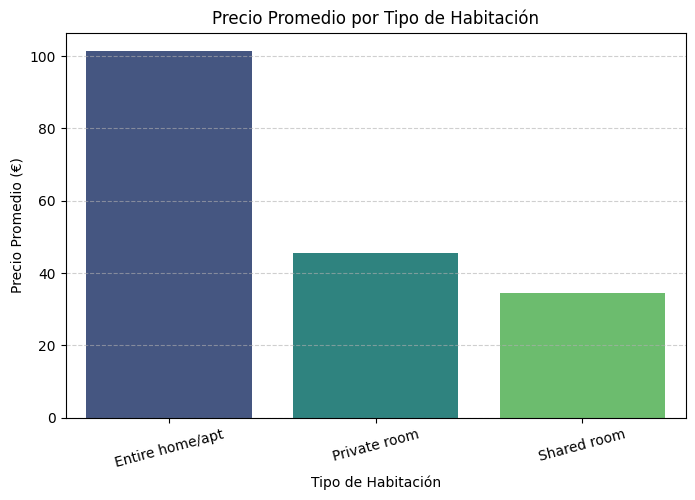


Puntuación media por barrio:



,neighborhood,overall_satisfaction
20,Santa Maria Maior,3.732392
0,Ajuda,3.722222
15,Misericórdia,3.695035
23,São Vicente,3.561479
12,Estrela,3.422167
21,Santo António,3.347373
6,Beato,3.297619
7,Belém,3.061024
4,Arroios,3.057797
9,Campo de Ourique,2.996865


/tmp/ipykernel_22665/1907090900.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


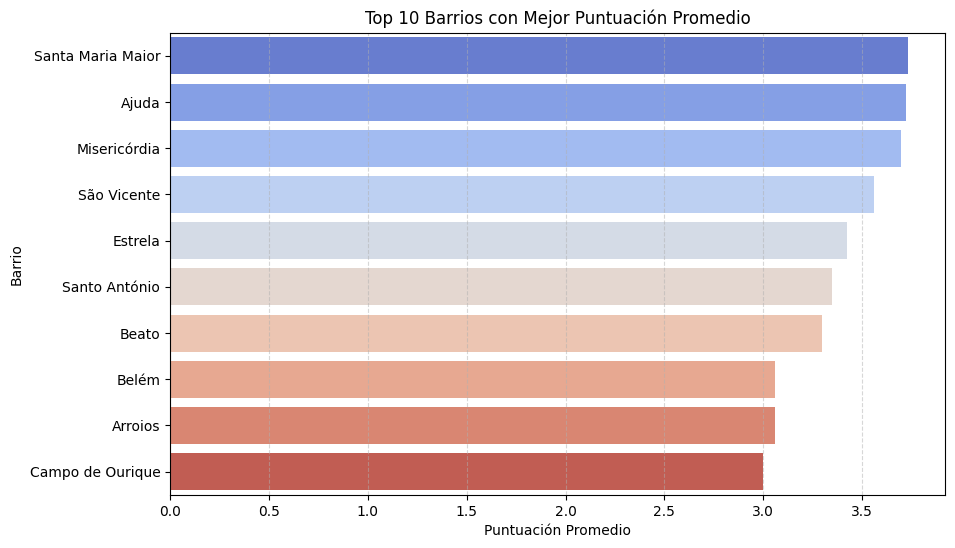

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que los datos están cargados
df_airbnb = pd.read_csv("./data/airbnb.csv")

# =====================================================
# Agrupamiento 1: Precio promedio por tipo de habitación
# =====================================================

grupo1 = df_airbnb.groupby('room_type')['price'].mean().reset_index()
print("Precio promedio por tipo de habitación:\n")
display(grupo1)

# Gráfico del agrupamiento 1
plt.figure(figsize=(8,5))
sns.barplot(x='room_type', y='price', data=grupo1, palette='viridis')
plt.title('Precio Promedio por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio Promedio (€)')
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


# =====================================================
# Agrupamiento 2: Puntuación media por barrio
# =====================================================

grupo2 = df_airbnb.groupby('neighborhood')['overall_satisfaction'].mean().reset_index()
grupo2 = grupo2.sort_values(by='overall_satisfaction', ascending=False)
print("\nPuntuación media por barrio:\n")
display(grupo2.head(10))  # mostramos los 10 mejores barrios

# Gráfico del agrupamiento 2
plt.figure(figsize=(10,6))
sns.barplot(
    x='overall_satisfaction',
    y='neighborhood',
    data=grupo2.head(10),
    palette='coolwarm'
)
plt.title('Top 10 Barrios con Mejor Puntuación Promedio')
plt.xlabel('Puntuación Promedio')
plt.ylabel('Barrio')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()
